#### Named Entity Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
import pandas as pd
book=pd.read_table("apple.txt",sep='\t')

# afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')

In [ ]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,I have been a Macbook pro user for last 2 year...
5,""""
6,I am very upset about the product as I checked...
7,Reason for 1 star is I ot an defective piece. ...
8,Got the Apple Macbook air on amazon discount s...
9,White line coming on screen in just three mont...


In [ ]:
book = [x.strip() for x in book.x]  # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

# Display List

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = book[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

# download  'en _cor'
# style = entity
# spacy.displacy.render --> it will a display the word attached catageory and entity

In [ ]:
for token in doc_block[0:20]:
    print(token, token.pos_)


Apple PROPN
, PUNCT
apple NOUN
, PUNCT
apple NOUN
, PUNCT
that PRON
s VERB
the DET
first ADJ
thing NOUN
that PRON
must AUX
have AUX
flashed VERB
in ADP
you PRON
mind VERB
when SCONJ
you PRON


In [ ]:
#Filtering for nouns and verbs only

nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])


['mind', 'saw', 'product', 'have', 'review', 'laptop', '***Pros***4k', 'thing', 'works', 'butter', 'is', 'heating', 'issue', 'going', 'go', 'apple', 'service', 'center', 'get', 'checkedEveryday']


In [ ]:
#Counting tokens again

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(nouns_verbs)   # Only noun verb
sum_words = X.sum(axis=0)                   # sum
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)                          #sort descending

wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,apple,9
1,graphics,5
2,service,4
3,get,4
4,laptop,3
5,works,3
6,going,3
7,support,3
8,video,3
9,thing,2


In [ ]:
# X

In [ ]:
# sum_words

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

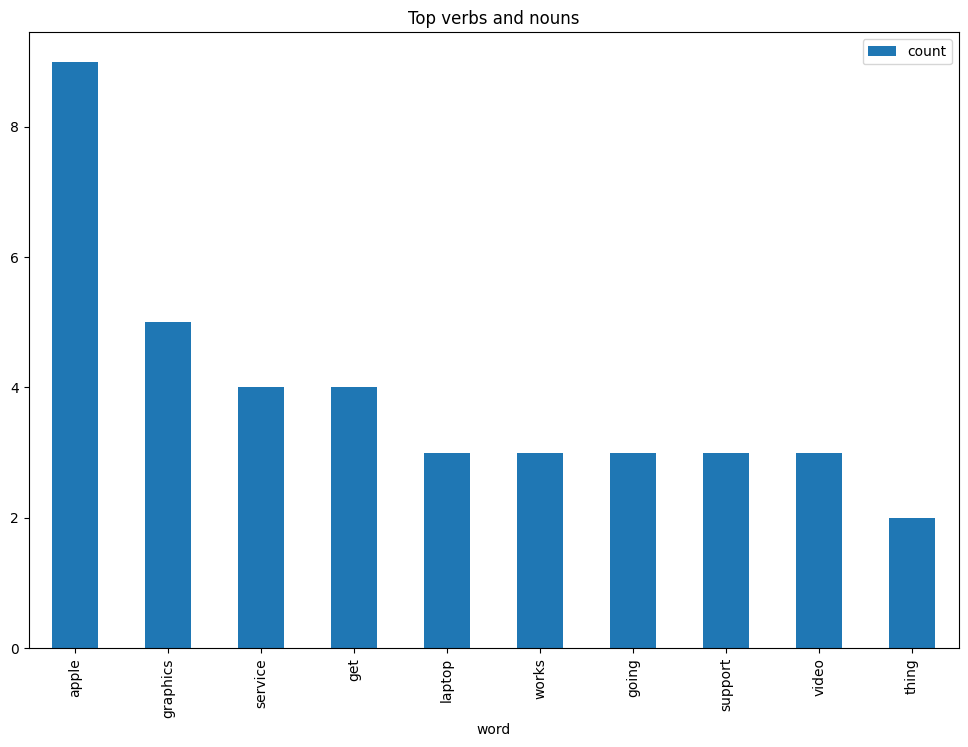

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

# sep=','             --> This argument tells pd.read_csv() that the values in the CSV file are separated by commas.
# encoding='latin-1'  --> This argument specifies the character encoding of the file. 'latin-1' is a common encoding that supports a wide range of characters.
# 2477 rows
# 2 columns           --> (word, values )

(2477, 2)

In [ ]:
afinn.tail()

,word,value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [ ]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# Iterable means an object that can be looped over
# It uses islice(iterable, n) to create an iterator that yields the first n items from the iterable.
# It then uses list() to convert this iterator into a list, which is returned by the function

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()   # every value convert in to dictionary
take(20, affinity_scores.items())



[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
# Try specifying the delimiter, it might be a tab, semicolon, or some other character
book=pd.read_csv("apple.txt", delimiter='\t')  # Replace '\t' with the actual delimiter if known
book = [x.strip() for x in book.x]             # remove both the leading and the trailing characters
book = [x for x in book if x]                  # removes empty strings, because they are considered in Python as False

In [ ]:
# book = [x.strip() for x in book.x]
# for x in book.x: Iterates through each item in the 'x' column: 1,2,3
# x.strip(): For each item (x), it removes the leading and trailing spaces
# example o/p : ['Hello World', 'Python is fun', 'Data Science']

In [ ]:
# book = [x for x in book if x]
# for x in book: Each item is temporarily assigned to the variable x
# if x:          This condition checks if x is not an empty string. Other falsy values in Python include 0, None, False, and empty collections
# x:             If the condition if x is True (meaning x is not an empty string or any other falsy value), then the current value of x is added to the new list.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize
sentences =sent_tokenize(" ".join(book))
sentences[5:15]

##  The sent_tokenize function now processes this joined string, identifying sentence boundaries based on punctuation.
##  The output, stored in the sentences variable, will be a list of individual sentences:

# sent_tokenizeit is nothing chaged into (convert into data frame)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Ove

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
210,You can get one of the best movie experiences ...
211,Overall I would it a 4.5/5.
212,"I got a great deal on this laptop, which I hav..."
213,I got it not only on discount but also was abl...


In [ ]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
!pip install spacy
import spacy

# Load the small English language model
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores                     # Mapped with affinscore

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0                                      # initally score will be zero
    if text:
        sentence = nlp(text)                            # every text in the sentence
        for word in sentence:                           # Every word in the sentence
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

# use limitagation
# calling a function --> calculate_sentiment

In [ ]:
# test that it works
calculate_sentiment(text = 'help')

2

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
210,You can get one of the best movie experiences ...,3
211,Overall I would it a 4.5/5.,0
212,"I got a great deal on this laptop, which I hav...",3
213,I got it not only on discount but also was abl...,0


In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

# words in 1 st row

,word_count
0,17
1,7
2,31
3,7
4,65
5,1
6,7
7,47
8,16
9,29


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
128,"Yes, I changed the thermal paste and dusted th...",5,24
92,I hope this comment can help to save somebody’...,6,10
131,The switch was inspired by the awesome reviews...,6,13
74,Ships with macOS sierra but update is availabl...,6,86
0,It's amazing..... battery last around 10 -12 h...,7,17
87,I use this for music production and it works a...,7,30
206,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7,43
179,..So now I m working with the external keyboar...,17,113
32,Basically i will be comparing this with a regu...,20,171
114,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

,sentiment_value
count,215.000000
mean,1.027907
std,3.459939
min,-11.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,24.000000


In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count
4,Problems will be there if you are switching fr...,-11,65
11,"Marketing strategy for Indian market, if at al...",-3,15
13,"Presently, it doesn't seem to be happening.Ove...",-2,19
14,"Else, think hard.",-1,3
28,Limited softwares available3.,-1,3


In [ ]:
sent_df[sent_df['sentiment_value']>=0].head()

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
5,!,0,1


In [ ]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-63-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

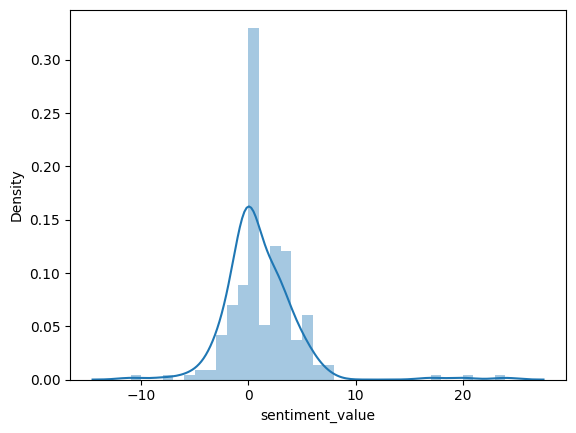

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

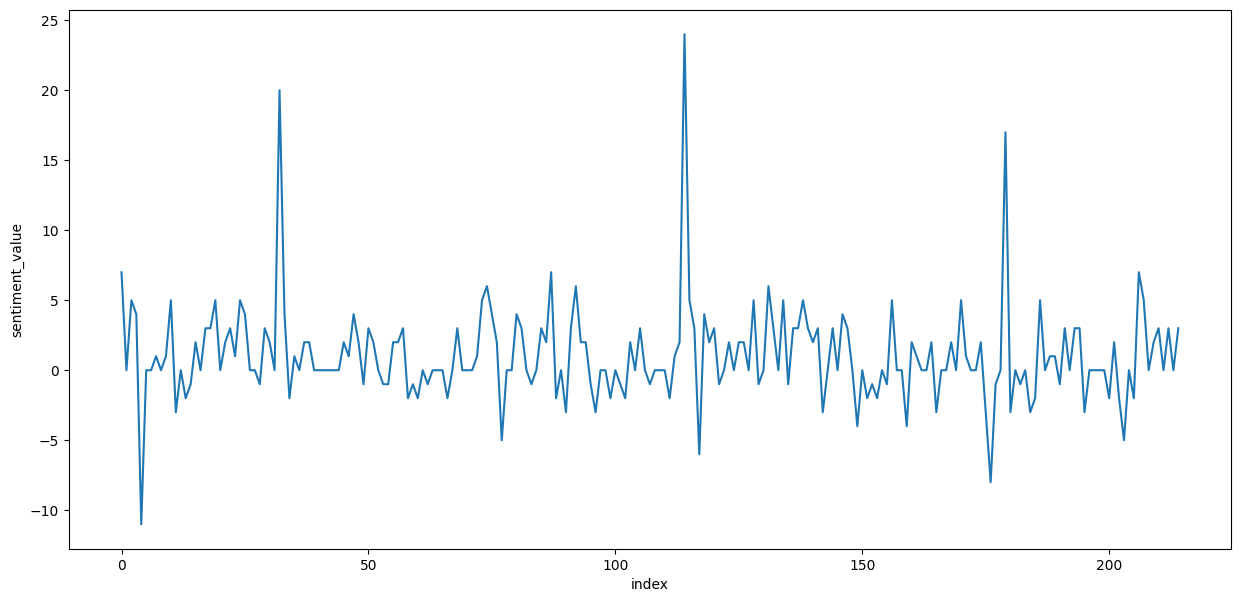

In [ ]:
# Line plot (sentiment , index)
plt.figure(figsize=(15,7 ))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

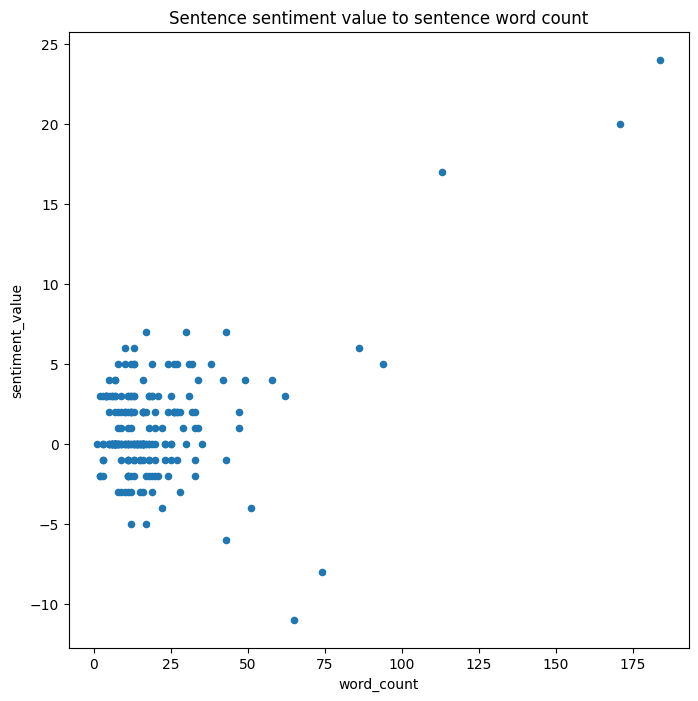

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')